#### Notebook to try to actually replicate the duck/cat example by kevin cowtan

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from phase_mixing_utils import *
from scipy.ndimage import imread

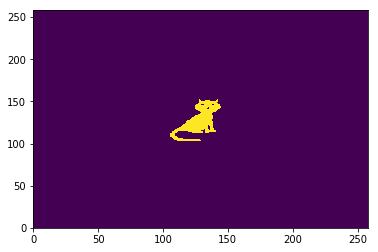

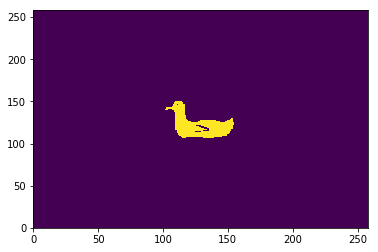

In [8]:
duck = imread('duck.png')
duck_data = np.abs(np.flipud(duck[:,:,0])/255 - 1)
cat = imread('cat1.png')
cat_data = np.abs(np.flipud(cat[:,:,0])/255-1)
plt.pcolor(cat_data)
plt.show()
plt.pcolor(duck_data)

In [9]:
cat_transformed = np.fft.fft2(cat_data)
duck_transformed = np.fft.fft2(duck_data)


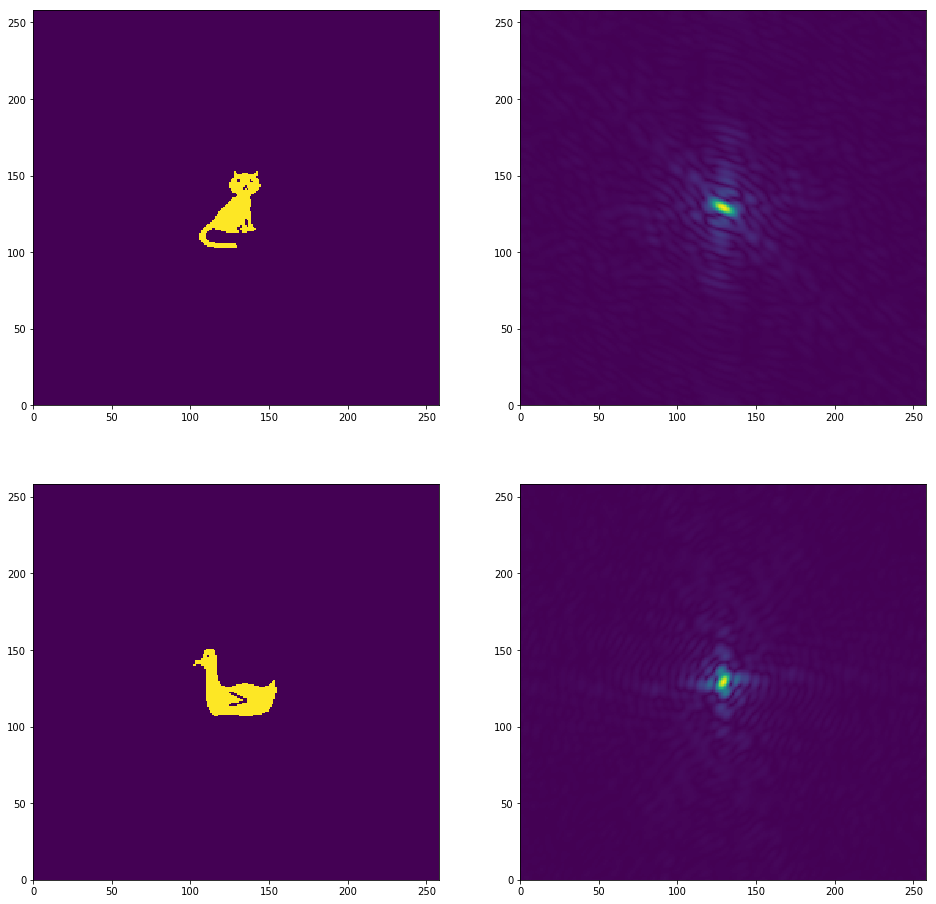

In [10]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(16,16))
ax1.pcolor(cat_data)
ax2.pcolor(np.abs(np.fft.fftshift(cat_transformed)))
ax3.pcolor(duck_data)
ax4.pcolor(np.abs(np.fft.fftshift(duck_transformed)))

plt.show()

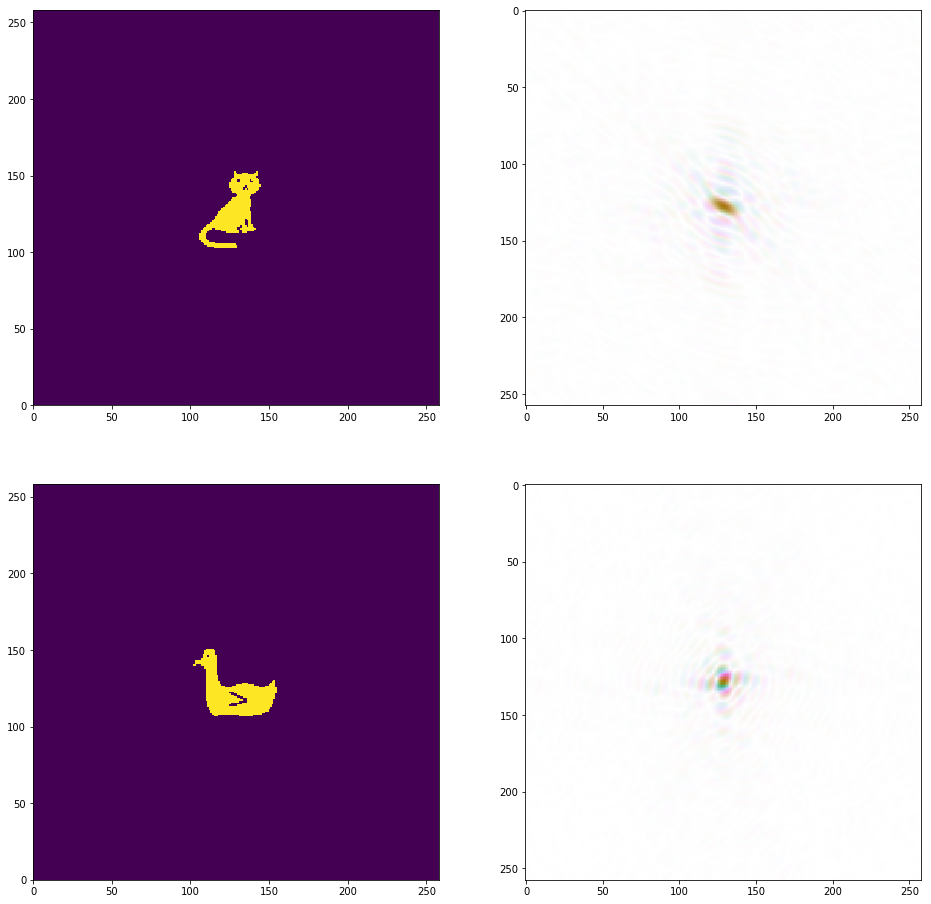

In [11]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2,figsize=(16,16))
ax1.pcolor(cat_data)
phase_intensity_plot(np.fft.fftshift(cat_transformed),ax2,cb=False)
ax3.pcolor(duck_data)
phase_intensity_plot(np.fft.fftshift(duck_transformed),ax4,cb=False)

plt.show()

In [12]:
cat_duck  = np.real_if_close(np.fft.ifft2(mix_FT(cat_data, duck_data)))
duck_cat  = np.real_if_close(np.fft.ifft2(mix_FT(duck_data, cat_data)))

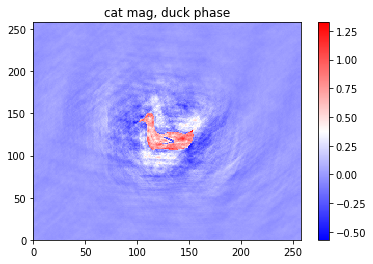

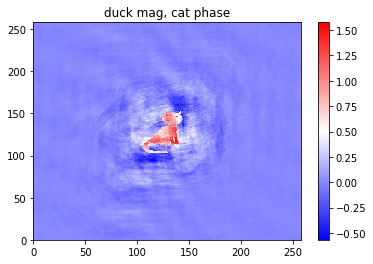

In [13]:
plt.pcolor(cat_duck,cmap='bwr')
plt.title('cat mag, duck phase')

plt.colorbar()
plt.show()
plt.pcolor(duck_cat,cmap='bwr')
plt.title('duck mag, cat phase')

plt.colorbar()
plt.show()

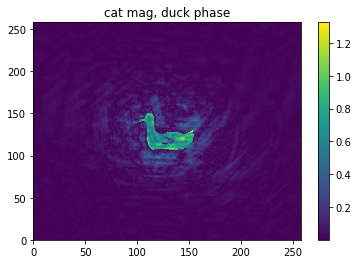

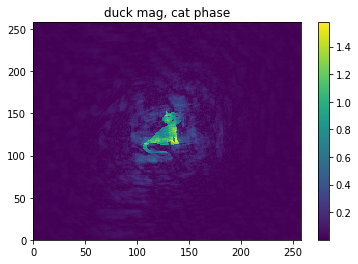

In [14]:
plt.pcolor(np.abs(cat_duck))
plt.title('cat mag, duck phase')
plt.colorbar()
plt.show()
plt.pcolor(np.abs(duck_cat))
plt.title('duck mag, cat phase')

plt.colorbar()
plt.show()

# exploring michaels worry that all the info is in the phase.

Though its impt to note that for an N pixel FT there are something like 2^N (wait shouldn't that be more) possible iFT. So maybe the 